<a href="https://colab.research.google.com/github/misbah4064/face_mask_detection/blob/master/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

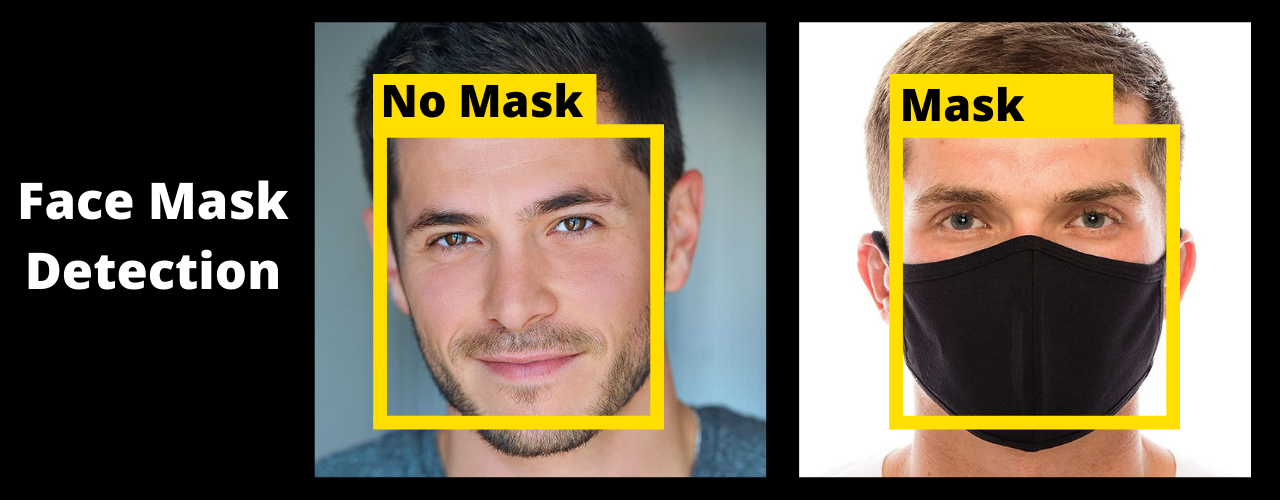

In [ ]:
!git clone https://github.com/misbah4064/face_mask_detection.git
%cd face_mask_detection

Cloning into 'face_mask_detection'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 12 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.
/content/face_mask_detection


In [2]:
import cv2
import os
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
from google.colab.patches import cv2_imshow

"haarcascade is the face detector application that been using to detect face in this project"
faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_alt2.xml")
"this is where the dataset of facemask and nonfacemask"
model = load_model("mask_recog.h5")

def face_mask_detector(frame):
  # frame = cv2.imread(fileName)
  "set the image into grayscale"
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  faces = faceCascade.detectMultiScale(gray,
                                        scaleFactor=1.1,
                                        minNeighbors=5,
                                        minSize=(60, 60),
                                        flags=cv2.CASCADE_SCALE_IMAGE)
  faces_list=[]
  preds=[]
  for (x, y, w, h) in faces:
      face_frame = frame[y:y+h,x:x+w]
      face_frame = cv2.cvtColor(face_frame, cv2.COLOR_BGR2RGB)
      face_frame = cv2.resize(face_frame, (224, 224))
      face_frame = img_to_array(face_frame)
      face_frame = np.expand_dims(face_frame, axis=0)
      face_frame =  preprocess_input(face_frame)
      "preprocess image upload by user to using face mask detection application harrascade"
      faces_list.append(face_frame)
      if len(faces_list)>0:
        "user uploaded image sended to predicted file to detect the person have teh mask or not using the dataset"
          preds = model.predict(faces_list)
          "after recognize person face system will label person mask or no mask with percentage"
      for pred in preds:
          (mask, withoutMask) = pred
          "labelling"
      label = "Mask" if mask > withoutMask else "No Mask"
      "percentage"
      color = (0, 255, 0) if label == "Mask" else (0, 0, 255)
      label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)
      cv2.putText(frame, label, (x, y- 10),
                  cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

      cv2.rectangle(frame, (x, y), (x + w, y + h),color, 3)
  # cv2_imshow(frame)
  return frame

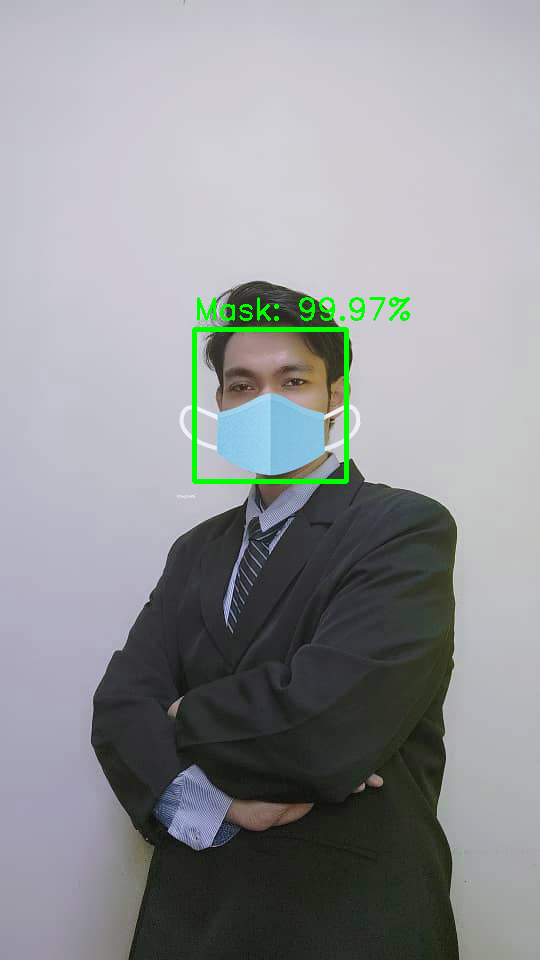

In [6]:
"read the image"
input_image = cv2.imread("Hazwan Haziq WIG180012.jpg")
"run fx face_mask_detector"
output = face_mask_detector(input_image)
"show output"
cv2_imshow(output)

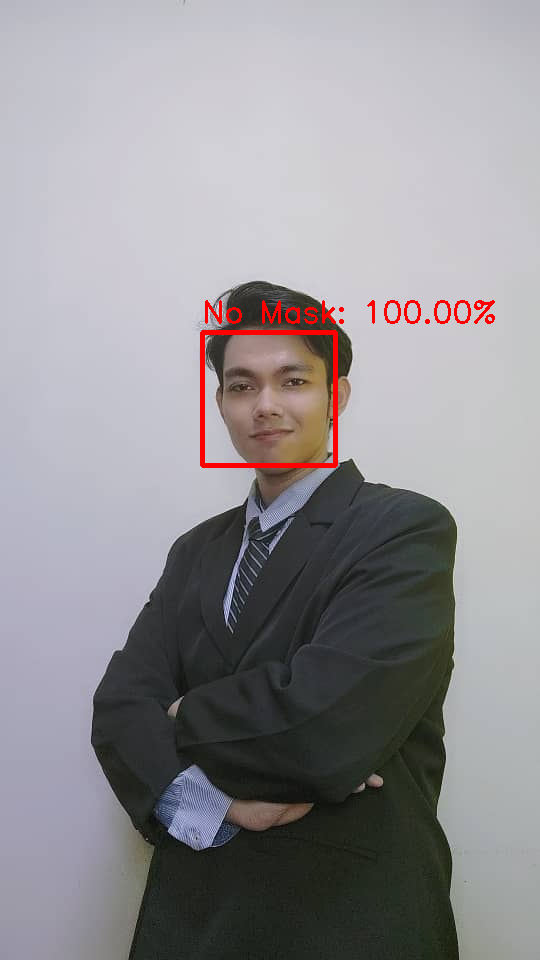

In [ ]:
input_image = cv2.imread("Hazwan Haziq WIG180012.jpeg")
output = face_mask_detector(input_image)
cv2_imshow(output)

In [ ]:
"read video file"
cap = cv2.VideoCapture('video.mp4')
ret, frame = cap.read()
frame_height, frame_width, _ = frame.shape
"defining output file"
out = cv2.VideoWriter('output.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))
print("Processing Video...")
"running trought video file"
while cap.isOpened():
  "read every frame in the video"
  ret, frame = cap.read()
  if not ret:
    out.release()
    break
    "send to face mask detector fx"
  output = face_mask_detector(frame)
  "output"
  out.write(output)
out.release()
print("Done processing video")